### This is notebook is meant to collect the summary data for each model and plot the results using a barplot.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read in data
df_knn = pd.read_csv('knn_summary_metrics.csv')
df_rf = pd.read_csv('rfc_cv_summary_metrics.csv')
df_svm = pd.read_csv('svm_summary_metrics.csv')
df_logr = pd.read_csv('logreg_summary_metrics.csv')

print(df_knn.shape)
print(df_rf.shape)
print(df_svm.shape)
print(df_logr.shape)

(1, 11)
(1, 11)
(1, 11)
(1, 11)


In [3]:
combined_df = pd.concat([df_logr, df_svm, df_knn, df_rf], axis=0)
combined_df.reset_index(drop=True, inplace=True)

In [4]:
combined_df

,Model,F1_Mean,F1_Std,Recall_Mean,Recall_Std,Precision_Mean,Precision_Std,Accuracy_Mean,Accuracy_Std,ROC_AUC_Mean,ROC_AUC_Std
0,LogisticRegression,0.671467,0.042784,0.746611,0.069829,0.611665,0.032027,0.746159,0.028517,0.838572,0.026419
1,SVM,0.666449,0.042264,0.720056,0.032250,0.625131,0.072287,0.746023,0.046213,0.836296,0.023382
2,KNN,0.642992,0.023091,0.716352,0.040083,0.584595,0.026014,0.722621,0.019169,0.783002,0.025515
3,RandomForest_CV,0.659346,0.014334,0.663677,0.021841,0.657131,0.035940,0.760616,0.017878,0.832461,0.021198


In [5]:
#Renaming the models for better readability
combined_df['Model'] = combined_df['Model'].replace({
    'RandomForest_CV' : 'Random Forest',
    'LogisticRegression' : 'Logistic Regression'
})
combined_df 

,Model,F1_Mean,F1_Std,Recall_Mean,Recall_Std,Precision_Mean,Precision_Std,Accuracy_Mean,Accuracy_Std,ROC_AUC_Mean,ROC_AUC_Std
0,Logistic Regression,0.671467,0.042784,0.746611,0.069829,0.611665,0.032027,0.746159,0.028517,0.838572,0.026419
1,SVM,0.666449,0.042264,0.720056,0.032250,0.625131,0.072287,0.746023,0.046213,0.836296,0.023382
2,KNN,0.642992,0.023091,0.716352,0.040083,0.584595,0.026014,0.722621,0.019169,0.783002,0.025515
3,Random Forest,0.659346,0.014334,0.663677,0.021841,0.657131,0.035940,0.760616,0.017878,0.832461,0.021198


In [6]:
#Renaming the columns for better readability
combined_df = combined_df.rename(columns={
    'ROC_AUC_Mean' : 'ROC AUC_Mean',
    'ROC_AUC_Std' : 'ROC AUC_Std',
    'F1_Mean' : 'F1 Score_Mean',
    'F1_Std' : 'F1 Score_Std',
})
combined_df

,Model,F1 Score_Mean,F1 Score_Std,Recall_Mean,Recall_Std,Precision_Mean,Precision_Std,Accuracy_Mean,Accuracy_Std,ROC AUC_Mean,ROC AUC_Std
0,Logistic Regression,0.671467,0.042784,0.746611,0.069829,0.611665,0.032027,0.746159,0.028517,0.838572,0.026419
1,SVM,0.666449,0.042264,0.720056,0.032250,0.625131,0.072287,0.746023,0.046213,0.836296,0.023382
2,KNN,0.642992,0.023091,0.716352,0.040083,0.584595,0.026014,0.722621,0.019169,0.783002,0.025515
3,Random Forest,0.659346,0.014334,0.663677,0.021841,0.657131,0.035940,0.760616,0.017878,0.832461,0.021198


In [7]:
# Defining metrics and order
metrics = ['Recall', 'Precision', 'F1 Score', 'ROC AUC', 'Accuracy']

mean_values = [combined_df[f'{metric}_Mean'] for metric in metrics]
std_values = [combined_df[f'{metric}_Std'] for metric in metrics]


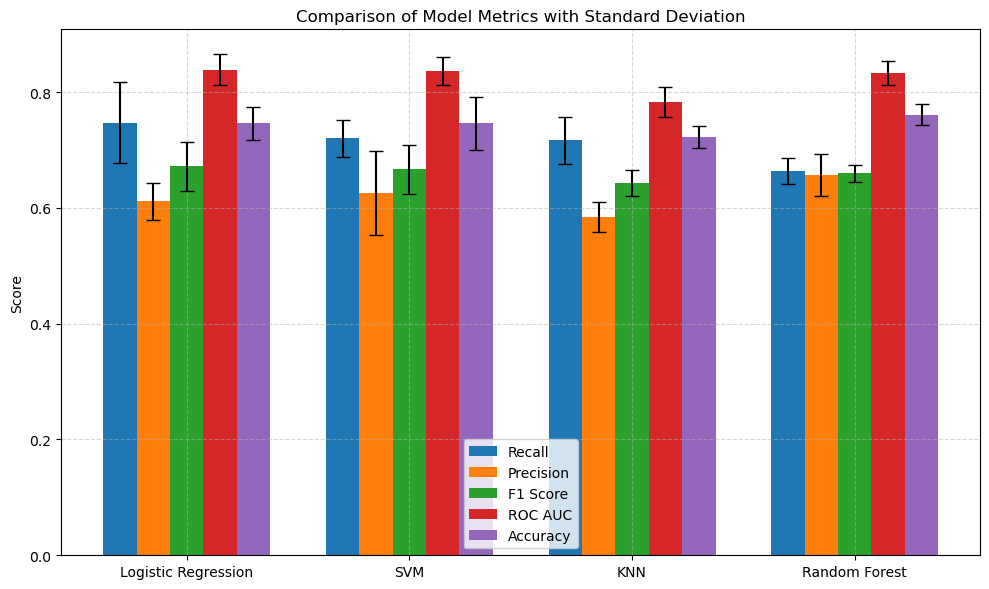

In [12]:
#Plot setup
x = np.arange(len(combined_df['Model']))
width = 0.15
fig, ax = plt.subplots(figsize=(10, 6))
#Create bars for each metric, with small offsets.
for i, (mean, std) in enumerate(zip(mean_values, std_values)):
    ax.bar(x + i * width, mean, width, yerr= std, label= metrics[i], capsize=5)

ax.set_xticks(x + width * (len(metrics) - 1) / 2)
ax.set_xticklabels(combined_df['Model'])
ax.set_ylabel('Score')
ax.set_title('Comparison of Model Metrics with Standard Deviation')
ax.legend()
ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig('../Figures/barplot_models_plt.png', dpi = 300)
plt.show()

In [9]:
#seaborn plot 

plot_df = pd.DataFrame()

for metric in metrics:
    temp_df = combined_df[['Model', f'{metric}_Mean', f'{metric}_Std']].copy()
    temp_df['Metric'] = metric
    temp_df.rename(columns={f'{metric}_Mean': 'Mean', f'{metric}_Std': 'Std'}, inplace=True)
    plot_df = pd.concat([plot_df, temp_df], ignore_index=True)


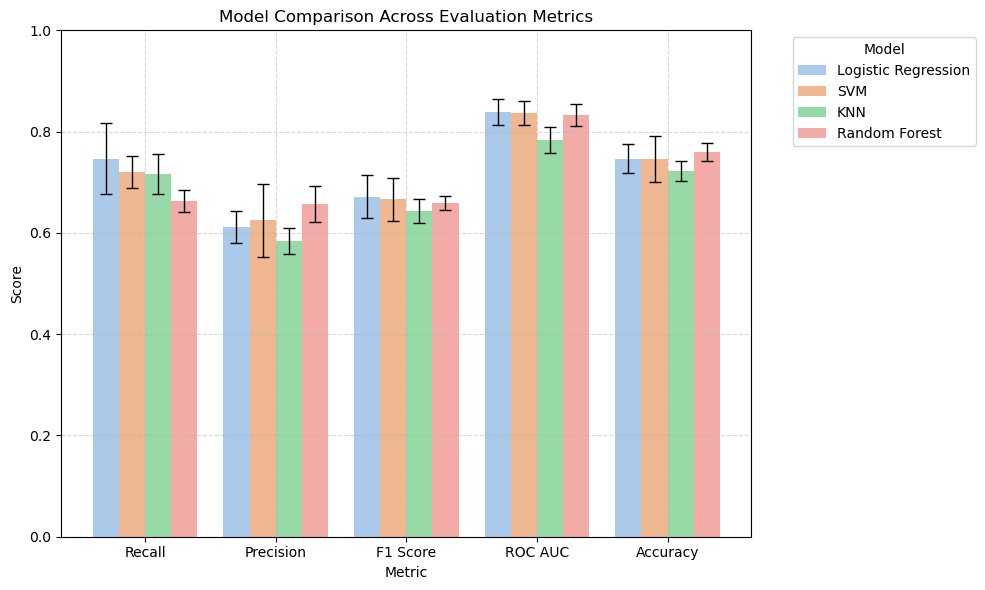

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Prepare figure
plt.figure(figsize=(10, 6))

# Plot bars without Seaborn’s internal error bars
sns.barplot(
    data=plot_df,
    x='Metric',
    y='Mean',
    hue='Model',
    palette='pastel',
    errorbar=None,
    capsize=0.1,
    err_kws={'linewidth': 1}
)

# Add manual error bars, correctly positioned
metric_order = plot_df['Metric'].unique()
model_order = plot_df['Model'].unique()
n_models = len(model_order)

# Create mapping of category positions
for i, metric in enumerate(metric_order):
    for j, model in enumerate(model_order):
        # Select the corresponding row
        row = plot_df[(plot_df['Metric'] == metric) & (plot_df['Model'] == model)].iloc[0]
        # Calculate x position with dodge logic (hard-coded for 0.8 bar width)
        x = i - 0.4 + (j + 0.5) * 0.8 / n_models
        plt.errorbar(
            x=x,
            y=row['Mean'],
            yerr=row['Std'],
            fmt='none',
            c='black',
            capsize=4,
            linewidth=1
        )

# Final formatting
plt.title('Model Comparison Across Evaluation Metrics')
plt.ylabel('Score')
plt.xlabel('Metric')
plt.ylim(0, 1.0)
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('../Figures/barplot_models_sns.png', dpi=300)
plt.show()
